In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_22896\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:/Users/USER/Downloads/DATA/hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [4]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

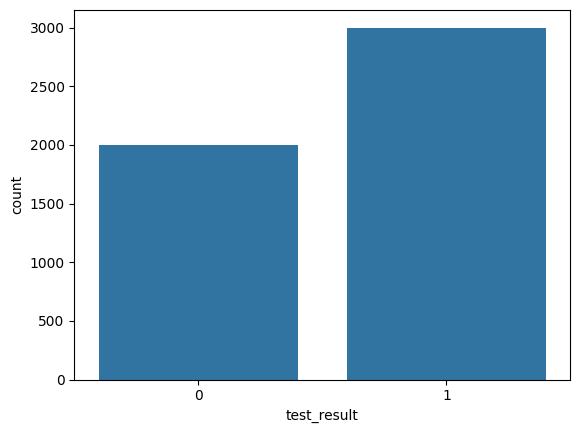

In [5]:
sns.countplot(df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

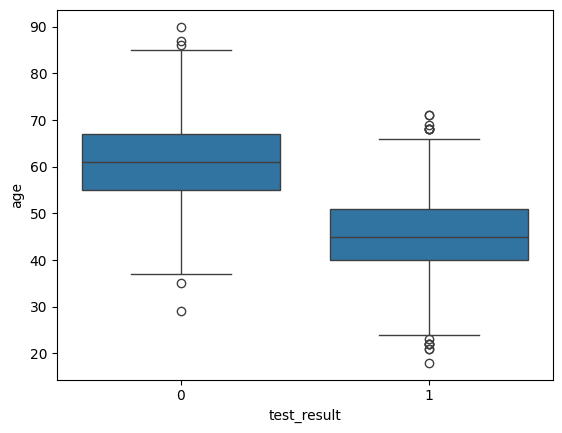

In [6]:
sns.boxplot(df, x='test_result', y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

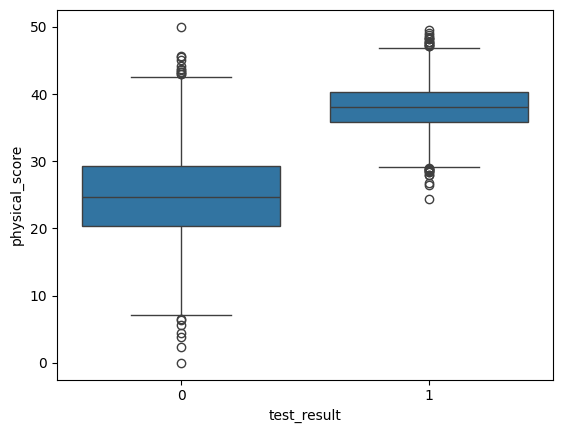

In [7]:
sns.boxplot(df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

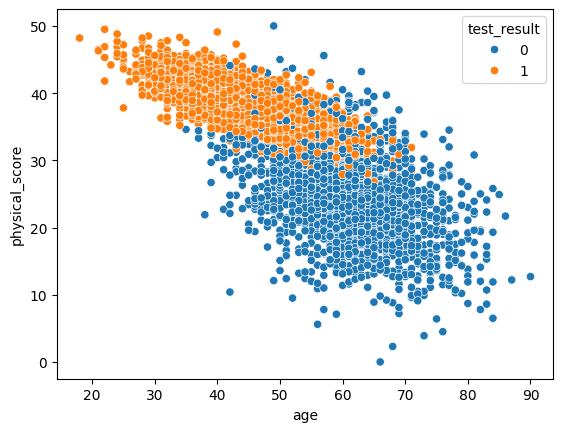

In [8]:
sns.scatterplot(df, x='age', y='physical_score', hue='test_result')

Correlation

<Axes: >

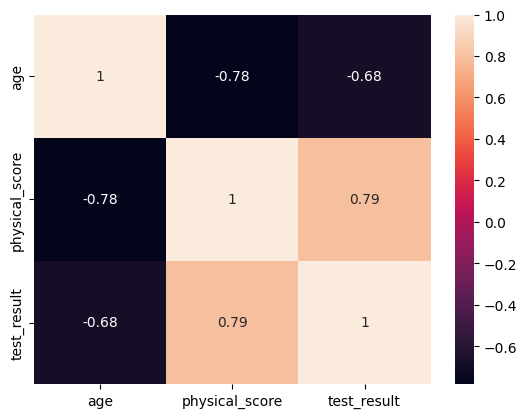

In [9]:
sns.heatmap(df.corr(), annot=True)

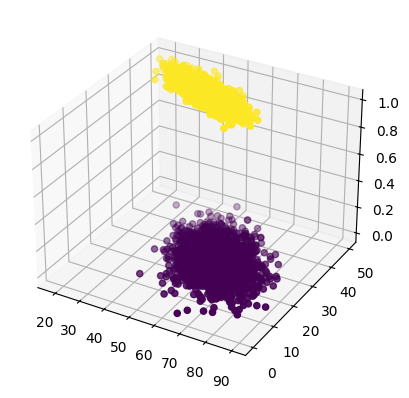

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [11]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [14]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [16]:
y_pred = log_model.predict(scaled_X_test)

In [17]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [18]:
y_pred = log_model.predict_proba(scaled_X_test)

In [19]:
y_pred

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [20]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [21]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = log_model.predict(scaled_X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.93

In [24]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [37]:
log_model.predict_proba(scaled_X_test)[5]

array([0.98967692, 0.01032308])

In [38]:
y_pred[5]

0